<a href="https://colab.research.google.com/github/pertvirt/hello_world/blob/master/Reverse_Image_Seach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Using TensorFlow backend.


In [2]:
!unzip test

Archive:  test.zip
   creating: test/
  inflating: test/image_0001.jpg     
  inflating: test/image_0002.jpg     
  inflating: test/image_0003.jpg     
  inflating: test/image_0004.jpg     
  inflating: test/image_0005.jpg     
  inflating: test/image_0006.jpg     
  inflating: test/image_0007.jpg     
  inflating: test/image_0008.jpg     
  inflating: test/image_0009.jpg     
  inflating: test/image_0010.jpg     
  inflating: test/image_0011.jpg     
  inflating: test/image_0012.jpg     
  inflating: test/image_0013.jpg     
  inflating: test/image_0014.jpg     
  inflating: test/image_0015.jpg     
  inflating: test/image_0016.jpg     
  inflating: test/image_0017.jpg     
  inflating: test/image_0019.jpg     
  inflating: test/image_0020.jpg     
  inflating: test/image_0021.jpg     
  inflating: test/image_0022.jpg     
  inflating: test/image_0023.jpg     
  inflating: test/image_0024.jpg     
  inflating: test/image_0025.jpg     
  inflating: test/image_0026.jpg     
  inflating:

In [0]:
imgs_path = "/content/test/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 3 # number of most similar images to retrieve

In [8]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("Total images:",len(files))

Total images: 38


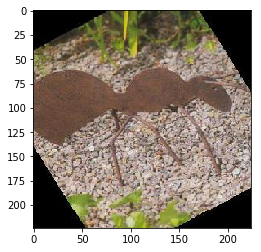

image loaded successfully!


In [10]:
# load image resized
original = load_img(files[2], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [11]:
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

image batch size (1, 224, 224, 3)


In [0]:
# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

In [13]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0.        , 0.        , 0.        , ..., 0.        , 0.30070585,
        0.        ]], dtype=float32)

In [0]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [15]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(37, 4096)

In [16]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/test/image_0007.jpg,/content/test/image_0002.jpg,/content/test/image_0003.jpg,/content/test/image_0004.jpg,/content/test/image_0038.jpg,/content/test/image_0020.jpg,/content/test/image_0010.jpg,/content/test/image_0037.jpg,/content/test/image_0005.jpg,/content/test/image_0036.jpg,/content/test/image_0032.jpg,/content/test/image_0028.jpg,/content/test/image_0035.jpg,/content/test/image_0014.jpg,/content/test/image_0027.jpg,/content/test/image_0029.jpg,/content/test/image_0006.jpg,/content/test/image_0001.jpg,/content/test/image_0017.jpg,/content/test/image_0026.jpg,/content/test/image_0030.jpg,/content/test/image_0012.jpg,/content/test/image_0021.jpg,/content/test/image_0022.jpg,/content/test/image_0023.jpg,/content/test/image_0025.jpg,/content/test/image_0011.jpg,/content/test/image_0015.jpg,/content/test/image_0033.jpg,/content/test/image_0008.jpg,/content/test/image_0016.jpg,/content/test/image_0034.jpg,/content/test/image_0024.jpg,/content/test/image_0019.jpg,/content/test/image_0031.jpg,/content/test/image_0013.jpg,/content/test/image_0009.jpg
/content/test/image_0007.jpg,1.000000,0.194730,0.261128,0.119691,0.189752,0.160335,0.129831,0.251651,0.088793,0.270457,0.088217,0.101307,0.129335,0.124511,0.228431,0.198234,0.123567,0.160927,0.207720,0.246865,0.090298,0.134685,0.156515,0.149519,0.114064,0.146083,0.201827,0.123952,0.177707,0.382495,0.203435,0.224424,0.191508,0.157766,0.132414,0.157841,0.364898
/content/test/image_0002.jpg,0.194730,1.000000,0.537257,0.153615,0.254642,0.340972,0.270752,0.171081,0.234525,0.300593,0.055458,0.117272,0.272906,0.282209,0.331731,0.222710,0.200213,0.462626,0.283877,0.352738,0.149823,0.361004,0.308269,0.318727,0.251920,0.199433,0.509049,0.292077,0.271091,0.259199,0.253904,0.296645,0.291421,0.393018,0.167924,0.384493,0.153973
/content/test/image_0003.jpg,0.261128,0.537257,1.000000,0.170171,0.236991,0.263357,0.194114,0.212590,0.285269,0.229689,0.138609,0.154455,0.292473,0.185508,0.268248,0.192921,0.225742,0.287258,0.280867,0.295015,0.190269,0.217875,0.292969,0.332115,0.268863,0.157316,0.374619,0.250337,0.260576,0.337418,0.333442,0.283507,0.347432,0.315928,0.148875,0.253655,0.280878
/content/test/image_0004.jpg,0.119691,0.153615,0.170171,1.000000,0.077683,0.135593,0.143763,0.089488,0.479393,0.126490,0.154131,0.245748,0.136263,0.300719,0.200804,0.188266,0.412955,0.124181,0.318080,0.230962,0.218479,0.157059,0.179525,0.136059,0.139193,0.202190,0.086994,0.253756,0.117859,0.123309,0.168390,0.153605,0.136520,0.136547,0.182009,0.113788,0.130810
/content/test/image_0038.jpg,0.189752,0.254642,0.236991,0.077683,1.000000,0.296424,0.240487,0.631790,0.087014,0.646248,0.089084,0.086508,0.420657,0.216366,0.266289,0.194738,0.150461,0.190226,0.319444,0.284469,0.149175,0.175134,0.201770,0.218469,0.352231,0.313680,0.213925,0.212405,0.689980,0.138974,0.217929,0.264057,0.265671,0.234580,0.145456,0.212844,0.158265


In [0]:
# function to retrieve the most similar images for a given one

def retrieve_most_similar_images(given_img):

    print("-----------------------------------------------------------------------")
    print("Image Query:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("Image results based on cosine similarity:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]
""
    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
Image Query:


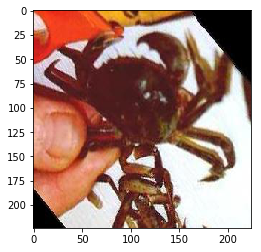

-----------------------------------------------------------------------
Image results based on cosine similarity:


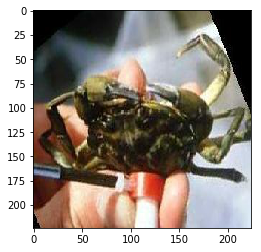

similarity score :  0.49361137


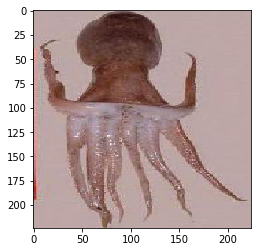

similarity score :  0.436578


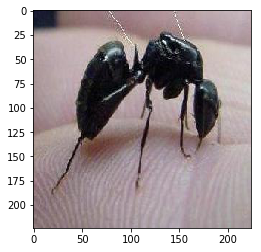

similarity score :  0.41408703


In [24]:
# retrieve the most N similar images
retrieve_most_similar_images(files[36])